<a href="https://colab.research.google.com/github/janderwow/imdb_movies/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns


In [177]:
# importando conjunto de dados
dataset = pd.read_csv("/content/drive/MyDrive/data_sets/imdb_dataset/imdb_top_1000.csv", sep=",")
# vizualizando os 5 primeiros registros do dataset
dataset.head()

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

In [ ]:
# verificando tamanho do conjunto de dados
dataset.shape

(1000, 16)

In [ ]:
# identificando numero de linhas e colulas
print('Número de linhas:', dataset.shape[0]) # valores vindos da tupla criada
print('Número de colunas:', dataset.shape[1])

Número de linhas: 1000
Número de colunas: 16


In [ ]:
# para retornar informacoes sobre o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
# verificando valores nulos no dataset
dataset.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
# verificando valores estatisticos gerais do dataset
dataset.describe()

IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06

In [90]:
# para trazer valores unicos
dataset['Certificate'].unique()

array(['A', 'UA', 'U', 'R', 'G', 'PG-13', 'PG', 'Passed', 'Approved',
       'TV-PG', 'U/A', 'GP'], dtype=object)

In [ ]:
# para trazer valores unicos # corrigir
lista_datas = dataset['Released_Year'].unique()
lista_datas.sort()
lista_datas

array(['1920', '1921', '1922', '1924', '1925', '1926', '1927', '1928',
       '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937',
       '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945',
       '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953',
       '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', 'PG'], dtype=object)

In [ ]:
# para trazer numero de valores unicos em uma coluna especifica
dataset['Certificate'].nunique()

16

In [ ]:
# contagem de valores unicos em uma coluna especifica
dataset['Certificate'].value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [5]:
# verificando valores nulos
print("Existe algum valor faltante no dataset?",dataset.isnull().values.any())

Existe algum valor faltante no dataset? True


<Axes: >

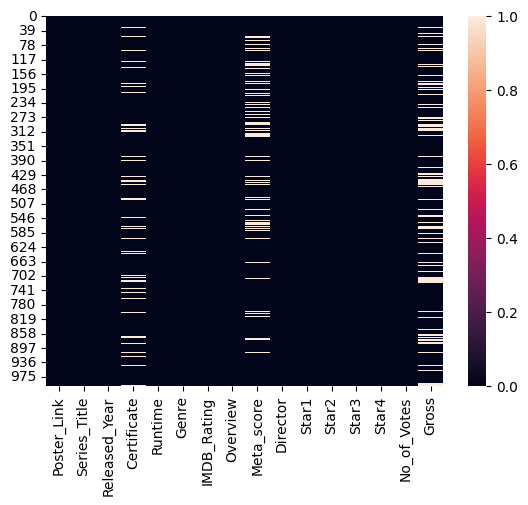

In [16]:
# vizualizando valores nulos em um heatmap
sns.heatmap(dataset.isnull())

In [20]:
# verificando valores duplicados
dupli_data = dataset.duplicated().any()
dupli_data

False

In [56]:
# contando valores nan
dataset.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [178]:
# dropando valores nulos
dataset.dropna(subset=['Certificate', 'Meta_score', 'Gross'], inplace=True)
dataset.isna().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [ ]:
# verificando lista de colunas
dataset.columns


Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [ ]:
# dropando colunas
dataset.drop('Poster_Link', axis =1, inplace= True)


In [101]:
# verificando tipos das colunas
print(dataset.dtypes)

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross              int32
dtype: object


In [179]:
# convertendo valores numericos
dataset['Gross'] = dataset['Gross'].str.replace(',','').astype('int32')
print(dataset.dtypes)


Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross              int32
dtype: object


In [96]:
# agrupando Arrecadação por diretor
agrup_por_diretor = dataset.groupby('Director')['Gross'].sum().sort_values(ascending= False)
agrup_por_diretor

Director
Steven Spielberg     2.478133e+09
Anthony Russo        2.205039e+09
Christopher Nolan    1.937454e+09
James Cameron        1.748237e+09
Peter Jackson        1.597312e+09
                         ...     
Tetsuya Nakashima    0.000000e+00
Ericson Core         0.000000e+00
Leo McCarey          0.000000e+00
Kinji Fukasaku       0.000000e+00
Ömer Faruk Sorak     0.000000e+00
Name: Gross, Length: 548, dtype: float64

In [103]:
dataset.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [112]:
# filmes com duração >= 180 minutos
dataset[dataset['Runtime'] >= 180]

TypeError: ignored

In [106]:
# convertendo run time em numerico
dataset['Runtime'] = dataset['Runtime'].astype('int32')

ValueError: ignored

In [146]:
s = pd.Series(["120 min", "138 min", "140 min"])
s

0    120 min
1    138 min
2    140 min
dtype: object

In [147]:
s.str.slice(stop = 3)

0    120
1    138
2    140
dtype: object

In [180]:
dataset['Runtime'] = dataset['Runtime'].str.slice(stop = 3)
dataset['Runtime']

0      142
1      175
2      152
3      202
4      96 
      ... 
990    157
991    144
992    78 
994    87 
997    118
Name: Runtime, Length: 714, dtype: object

In [184]:
dataset['Runtime'].unique()

array(['142', '175', '152', '202', '96 ', '201', '154', '195', '148',
       '139', '178', '161', '179', '136', '146', '124', '133', '132',
       '169', '130', '125', '189', '116', '127', '118', '121', '207',
       '122', '106', '112', '151', '150', '155', '119', '110', '88 ',
       '137', '165', '109', '102', '87 ', '126', '117', '181', '149',
       '105', '164', '170', '98 ', '101', '113', '134', '115', '147',
       '95 ', '123', '131', '153', '108', '104', '89 ', '81 ', '99 ',
       '160', '114', '129', '228', '128', '103', '107', '140', '138',
       '180', '158', '156', '135', '86 ', '162', '91 ', '172', '145',
       '93 ', '120', '80 ', '111', '100', '141', '92 ', '224', '188',
       '94 ', '183', '212', '238', '144', '143', '186', '83 ', '76 ',
       '90 ', '84 ', '191', '197', '174', '209', '97 ', '82 ', '85 ',
       '168', '157', '166', '192', '194', '159', '193', '72 ', '163',
       '78 '], dtype=object)

In [185]:
dataset['Runtime'] = dataset['Runtime'].astype('int32')
dataset['Runtime'] >= 180

0      False
1      False
2      False
3       True
4      False
       ...  
990    False
991    False
992    False
994    False
997    False
Name: Runtime, Length: 714, dtype: bool